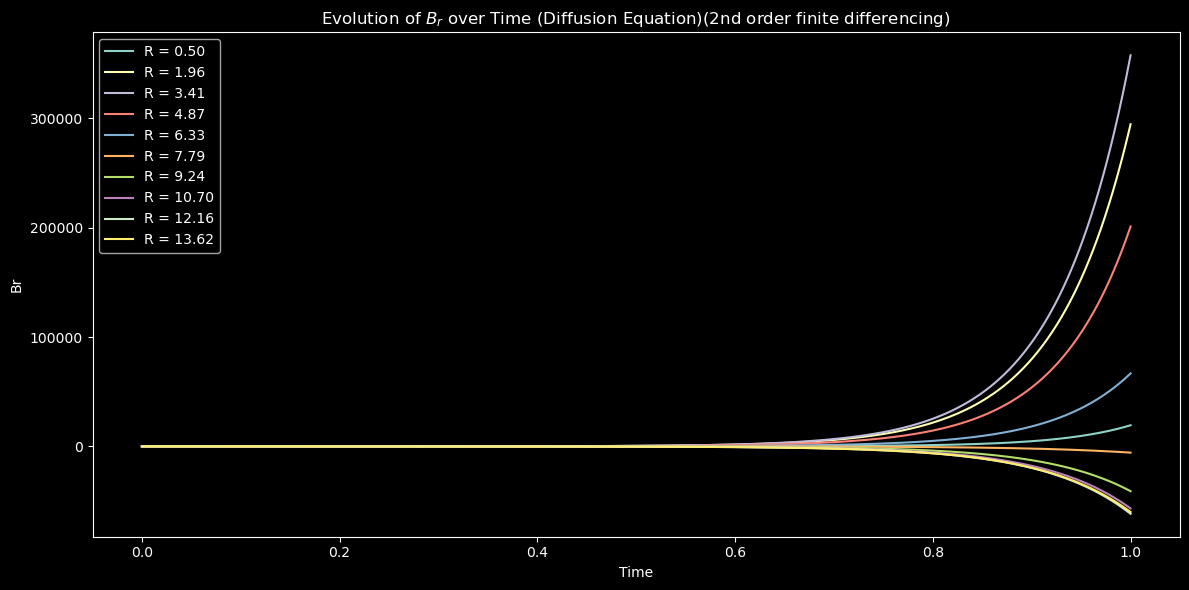

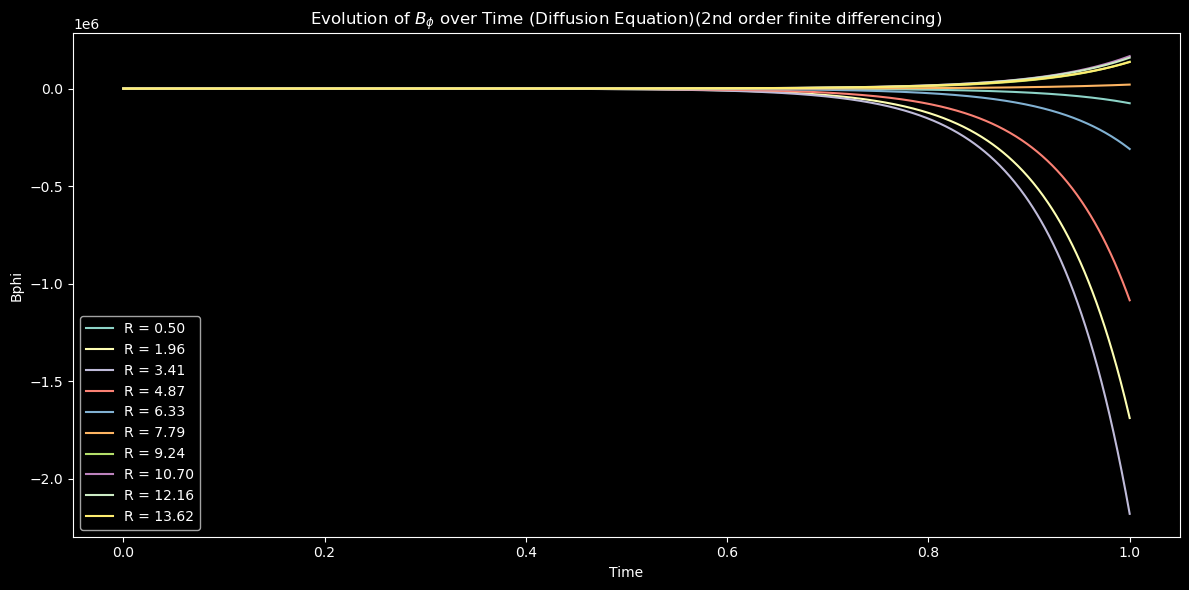

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('dark_background')

# Parameters
eta_diffusivity = 1  # turbulent magnetic diffusivity
np.random.seed(42)

# Radial grid
R_max = 15  # Maximum radial distance (in kpc)
Nr = 200  # Increased number of grid points in radial direction
dr = R_max / Nr

# Time parameters
Total_Time = 1  # Increased total time
Nt = 1000  # Increased number of time steps
dt = Total_Time / Nt
h = 0.5

# Initial magnetic field (considering only the radial component)
R = np.linspace(0.5, R_max, Nr)
Br = np.cos((np.pi * R) / R_max)
Bphi = np.cos(np.pi * R / R_max)

#B0 = 10
#Br = B0 * np.exp(-((R - R_max / 2) ** 2) / (2 * (R_max / 10) ** 2))
#Bphi = B0 * np.exp(-((R - R_max / 2) ** 2) / (2 * (R_max / 10) ** 2))

# Function to compute the radial Laplacian of Br
alpha_0 = 1
def compute_laplacian_Br(R, Br, Bphi):
    return eta_diffusivity * (np.gradient((1 / R) * np.gradient(R * Br, dr), dr) + ((np.pi) ** 2) * Br / (4 * h ** 2)) \
           - (2 * alpha_0 * Bphi / np.pi)

# Function to compute the radial Laplacian of Bphi
omega0 = 250
r_omega = 2
def compute_laplacian_Bphi(R, Br, Bphi):
    Omega = omega0 / (1 + (R / r_omega) ** 2) ** 0.5
    q = ((R / r_omega) ** 2) * (1 + (R / r_omega) ** 2) ** (-1)

    return eta_diffusivity * (np.gradient((1 / R) * np.gradient(R * Bphi, dr), dr) + ((np.pi) ** 2) * Br / (4 * h ** 2)) \
           - (q * Omega * Br)

# Store the evolution of magnetic field at different radial positions
evolution_of_Br = np.zeros((Nt + 1, Nr))
evolution_of_Bphi = np.zeros((Nt + 1, Nr))

# Time-stepping scheme using finite differencing
for t in range(Nt + 1):
    # Compute the Laplacians
    laplacian_Br = compute_laplacian_Br(R, Br, Bphi)
    laplacian_Bphi = compute_laplacian_Bphi(R, Br, Bphi)

    # Update Br and Bphi using the computed Laplacians
    Br += dt * laplacian_Br
    Bphi += dt * laplacian_Bphi

    # Store the evolution of magnetic field at different radial positions
    evolution_of_Br[t, :] = Br
    evolution_of_Bphi[t, :] = Bphi



# Plot the magnetic field components Br and Bphi with time at different radial positions
plt.figure(figsize=(12, 6))
for i in range(0, Nr, Nr // 10):
    plt.plot(np.linspace(0, Total_Time, Nt + 1), evolution_of_Br[:, i], label=f'R = {R[i]:.2f}')
plt.xlabel('Time')
plt.ylabel('Br')
plt.title('Evolution of $B_r$ over Time (Diffusion Equation)(2nd order finite differencing)')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for i in range(0, Nr, Nr // 10):
    plt.plot(np.linspace(0, Total_Time, Nt + 1), evolution_of_Bphi[:, i], label=f'R = {R[i]:.2f}')
plt.xlabel('Time')
plt.ylabel('Bphi')
plt.title('Evolution of $B_\phi$ over Time (Diffusion Equation)(2nd order finite differencing)')
plt.legend()
plt.tight_layout()
plt.show()


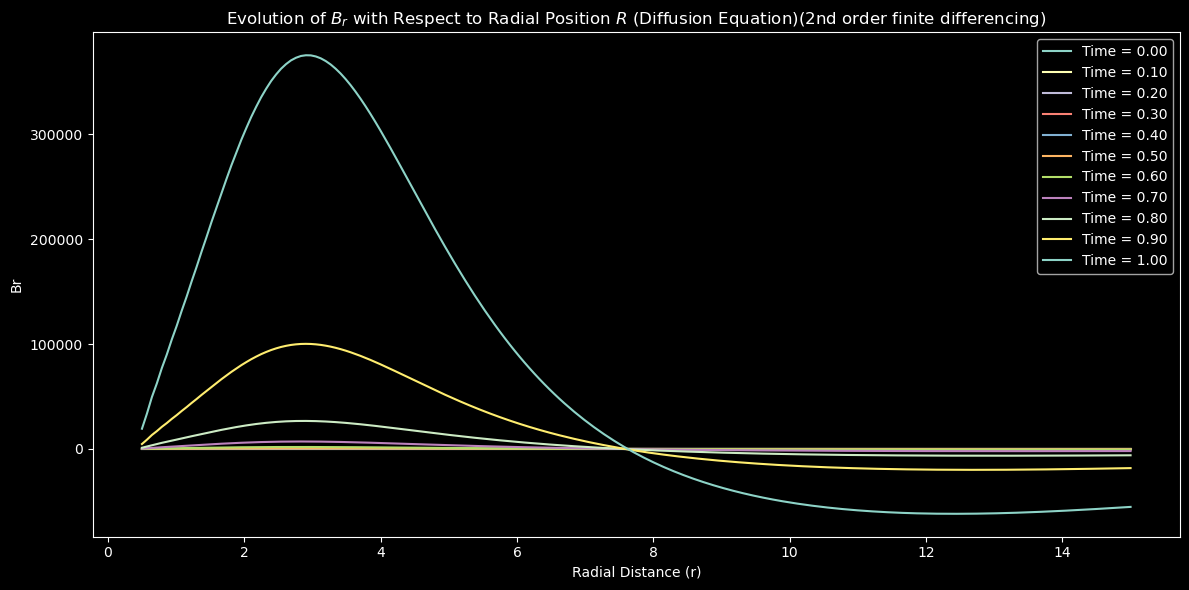

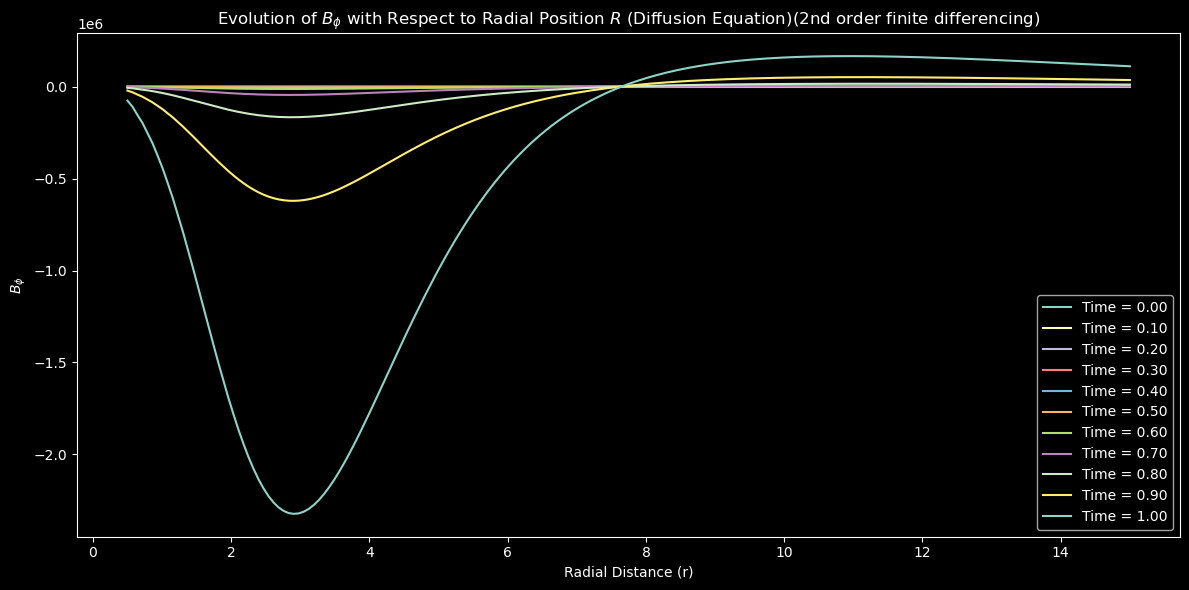

In [21]:

# Store the evolution of magnetic field components at different radial positions
evolution_Br = np.zeros((Nt + 1, Nr))
evolution_Bphi = np.zeros((Nt + 1, Nr))

for t in range(Nt + 1):
        # Store the current magnetic field for visualization
    evolution_Br[t, :] = np.copy(Br)
    evolution_Bphi[t, :] = np.copy(Bphi)
    Br += dt * compute_laplacian_Br(R, Br, Bphi)  # Update Br using finite differencing
    Bphi += dt * compute_laplacian_Bphi(R, Br, Bphi)  # Update Bphi using finite differencing


# Plot for Br
plt.figure(figsize=(12, 6))
for t in range(0, Nt + 1, Nt // 10):  # Plot every 10th time step
    plt.plot(R, evolution_of_Br[t, :], label=f'Time = {t * dt:.2f}')
plt.xlabel('Radial Distance (r)')
plt.ylabel('Br')
plt.title('Evolution of $B_r$ with Respect to Radial Position $R$ (Diffusion Equation)(2nd order finite differencing)')
plt.legend()
plt.tight_layout()
plt.show()

# Plot for Bphi
plt.figure(figsize=(12, 6))
for t in range(0, Nt + 1, Nt // 10):  # Plot every 10th time step
    plt.plot(R, evolution_of_Bphi[t, :], label=f'Time = {t * dt:.2f}')
plt.xlabel('Radial Distance (r)')
plt.ylabel('$B_{\phi}$')
plt.title('Evolution of $B_{\phi}$ with Respect to Radial Position $R$ (Diffusion Equation)(2nd order finite differencing)')
plt.legend()
plt.tight_layout()
plt.show()


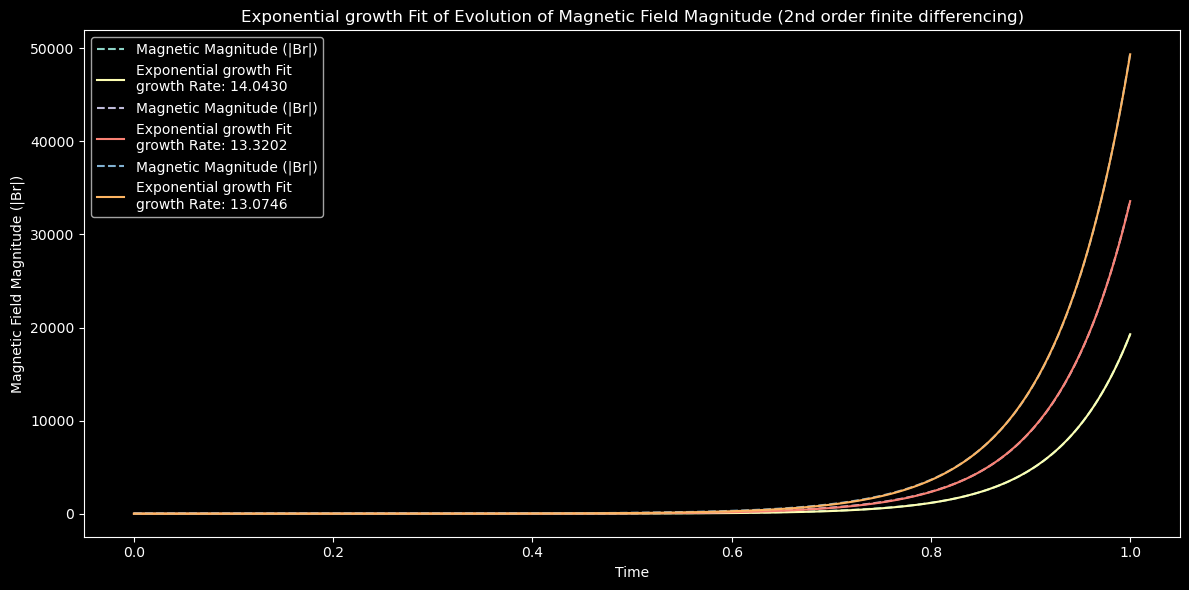

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Define a function for exponential decay
def Expo_growth_func(t, amplitude, growth_rate):
    return amplitude * np.exp(growth_rate * t)

# Extract time and magnetic field magnitude data
Time = np.linspace(0, Total_Time, Nt + 1)

# Plotting the fit
plt.figure(figsize=(12, 6))
for i in range(3):
    B_magnitude = np.abs(evolution_of_Br[:, i])  # Magnitude at a specific radial position
    plt.plot(Time, B_magnitude, label='Magnetic Magnitude (|Br|)', linestyle='--')
    # Fit the data to the exponential growth model
    fit_params, _ = curve_fit(Expo_growth_func, Time, B_magnitude)
    plt.plot(Time, Expo_growth_func(Time, *fit_params),  label=f'Exponential growth Fit\ngrowth Rate: {fit_params[1]:.4f}')
plt.xlabel('Time')
plt.ylabel('Magnetic Field Magnitude (|Br|)')
plt.title('Exponential growth Fit of Evolution of Magnetic Field Magnitude (2nd order finite differencing)')
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
for t in range(Nt + 1):
    D = np.array([])
    evolution_of_Br[t, :] = np.copy(Br)
    evolution_of_Bphi[t, :] = np.copy(Bphi)
    Omega = omega0 / (1 + (R / r_omega) ** 2) ** 0.5
    q = ((R / r_omega) ** 2) * (1 + (R / r_omega) ** 2) ** (-1)
    D_ = -(alpha_0*q*Omega*h**3)/(eta_diffusivity**2)
    D = np.append(D, D_)

The critcal dynamo number value we get = -12.0281
The value of R at which the critcal value is reached = 2.4121


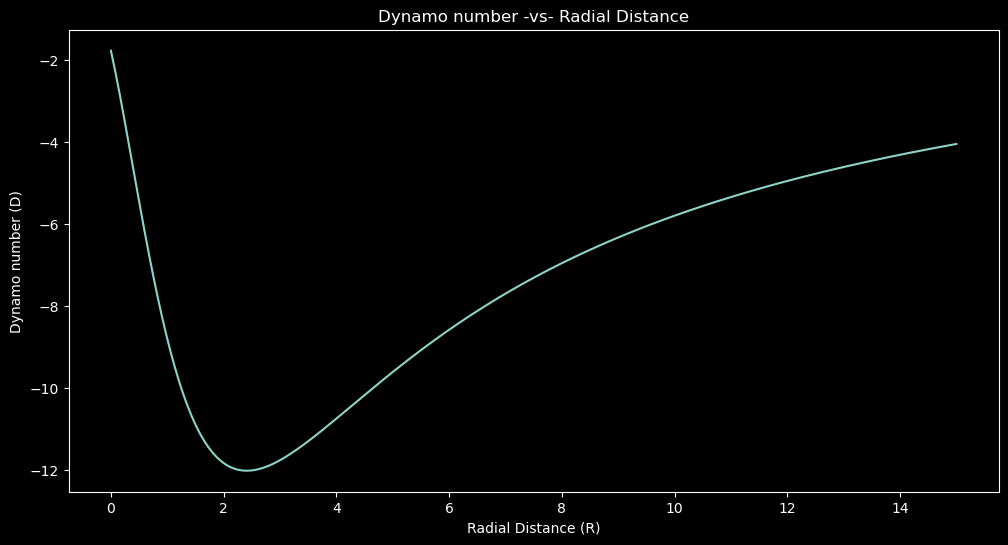

In [24]:
r = np.linspace(0, R_max, len(D))
plt.figure(figsize=(12, 6))
plt.plot(r,D)
plt.xlabel('Radial Distance (R)')
plt.ylabel('Dynamo number (D)')
plt.title('Dynamo number -vs- Radial Distance')

# to find the critical dynamo number
print(f'The critcal dynamo number value we get = {np.min(D):.4f}')
print(f'The value of R at which the critcal value is reached = {r[np.argmin(D)]:.4f}')


# 4th order finite differencing method 

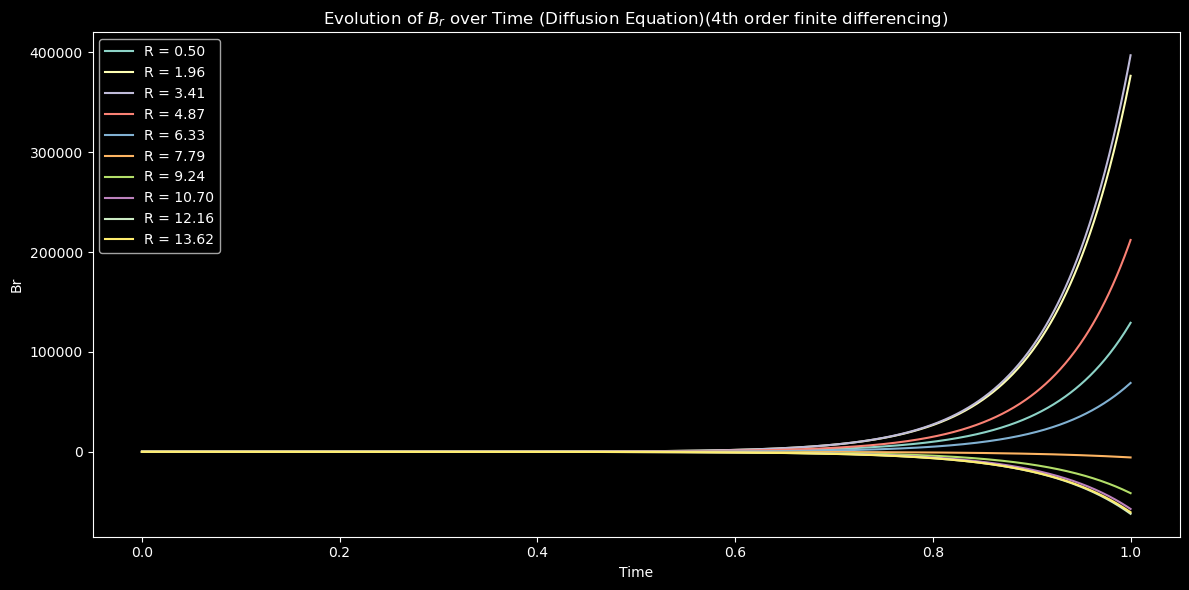

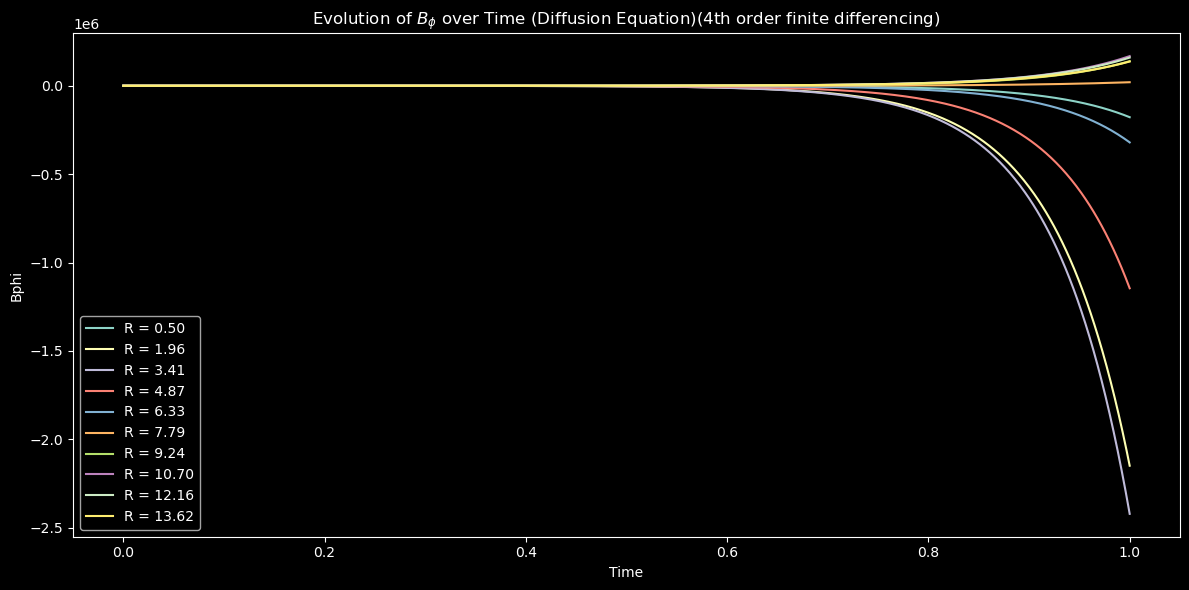

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
eta_diffusivity = 1  # turbulent magnetic diffusivity
np.random.seed(42)

# Radial grid
R_max = 15  # Maximum radial distance (in kpc)
Nr = 200  # Increased number of grid points in radial direction
dr = R_max / Nr

# Time parameters
Total_Time = 1  # Increased total time
Nt = 1000  # Increased number of time steps
dt = Total_Time / Nt
h = 0.5

# Initial magnetic field (considering only the radial component)
R = np.linspace(0.5, R_max, Nr)
Br = np.cos((np.pi * R) / R_max)
Bphi = np.cos(np.pi * R / R_max)

#B0 = 10
#Br = B0 * np.exp(-((R - R_max / 2) ** 2) / (2 * (R_max / 10) ** 2))
#Bphi = B0 * np.exp(-((R - R_max / 2) ** 2) / (2 * (R_max / 10) ** 2))

# Function to compute the radial Laplacian of Br
alpha_0 = 1
def compute_laplacian_Br(R, Br, Bphi):
    Br_grad = np.gradient(Br, dr)
    Br_grad2 = np.gradient(Br_grad, dr)
    return eta_diffusivity * (1 / R) * np.gradient(R * Br_grad, dr, edge_order=2) \
           + ((np.pi) ** 2) * Br / (4 * h ** 2) \
           - (2 * alpha_0 * Bphi / np.pi)

# Function to compute the radial Laplacian of Bphi
omega0 = 250
r_omega = 2
def compute_laplacian_Bphi(R, Br, Bphi):
    Bphi_grad = np.gradient(Bphi, dr)
    Bphi_grad2 = np.gradient(Bphi_grad, dr)
    Omega = omega0 / (1 + (R / r_omega) ** 2) ** 0.5
    q = ((R / r_omega) ** 2) * (1 + (R / r_omega) ** 2) ** (-1)
    return eta_diffusivity * (1 / R) * np.gradient(R * Bphi_grad, dr, edge_order=2) \
           + ((np.pi) ** 2) * Br / (4 * h ** 2) \
           - (q * Omega * Br)


# Store the evolution of magnetic field at different radial positions
evolution_of_Br = np.zeros((Nt + 1, Nr))
evolution_of_Bphi = np.zeros((Nt + 1, Nr))

# Time-stepping scheme using finite differencing
for t in range(Nt + 1):
    # Compute the Laplacians
    laplacian_Br = compute_laplacian_Br(R, Br, Bphi)
    laplacian_Bphi = compute_laplacian_Bphi(R, Br, Bphi)

    # Update Br and Bphi using the computed Laplacians
    Br += dt * laplacian_Br
    Bphi += dt * laplacian_Bphi

    # Store the evolution of magnetic field at different radial positions
    evolution_of_Br[t, :] = Br
    evolution_of_Bphi[t, :] = Bphi



# Plot the magnetic field components Br and Bphi with time at different radial positions
plt.figure(figsize=(12, 6))
for i in range(0, Nr, Nr // 10):
    plt.plot(np.linspace(0, Total_Time, Nt + 1), evolution_of_Br[:, i], label=f'R = {R[i]:.2f}')
plt.xlabel('Time')
plt.ylabel('Br')
plt.title('Evolution of $B_r$ over Time (Diffusion Equation)(4th order finite differencing)')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for i in range(0, Nr, Nr // 10):
    plt.plot(np.linspace(0, Total_Time, Nt + 1), evolution_of_Bphi[:, i], label=f'R = {R[i]:.2f}')
plt.xlabel('Time')
plt.ylabel('Bphi')
plt.title('Evolution of $B_\phi$ over Time (Diffusion Equation)(4th order finite differencing)')
plt.legend()
plt.tight_layout()
plt.show()


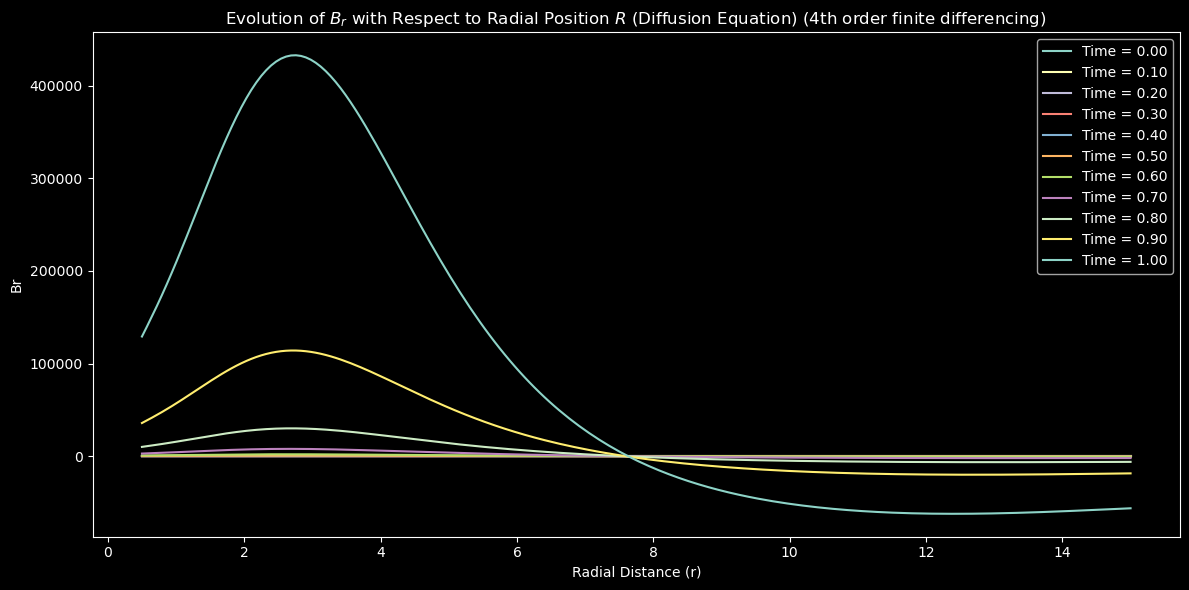

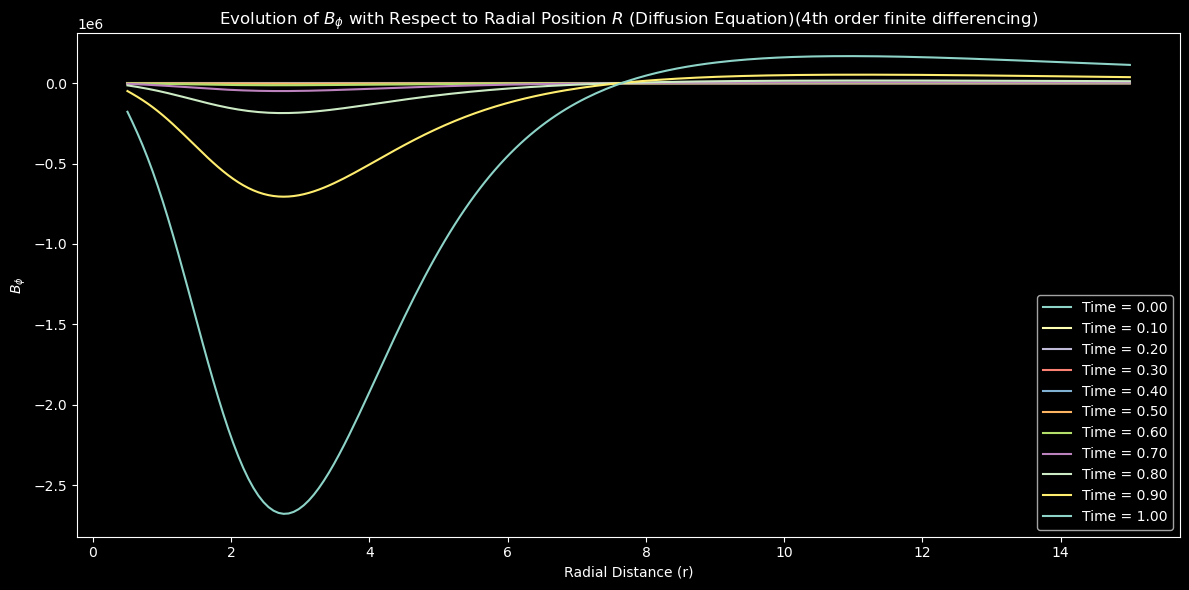

In [26]:
# Store the evolution of magnetic field components at different radial positions
evolution_Br = np.zeros((Nt + 1, Nr))
evolution_Bphi = np.zeros((Nt + 1, Nr))

for t in range(Nt + 1):
        # Store the current magnetic field for visualization
    evolution_Br[t, :] = np.copy(Br)
    evolution_Bphi[t, :] = np.copy(Bphi)
    Br += dt * compute_laplacian_Br(R, Br, Bphi)  # Update Br using finite differencing
    Bphi += dt * compute_laplacian_Bphi(R, Br, Bphi)  # Update Bphi using finite differencing


# Plot for Br
plt.figure(figsize=(12, 6))
for t in range(0, Nt + 1, Nt // 10):  # Plot every 10th time step
    plt.plot(R, evolution_of_Br[t, :], label=f'Time = {t * dt:.2f}')
plt.xlabel('Radial Distance (r)')
plt.ylabel('Br')
plt.title('Evolution of $B_r$ with Respect to Radial Position $R$ (Diffusion Equation) (4th order finite differencing)')
plt.legend()
plt.tight_layout()
plt.show()

# Plot for Bphi
plt.figure(figsize=(12, 6))
for t in range(0, Nt + 1, Nt // 10):  # Plot every 10th time step
    plt.plot(R, evolution_of_Bphi[t, :], label=f'Time = {t * dt:.2f}')
plt.xlabel('Radial Distance (r)')
plt.ylabel('$B_{\phi}$')
plt.title('Evolution of $B_{\phi}$ with Respect to Radial Position $R$ (Diffusion Equation)(4th order finite differencing)')
plt.legend()
plt.tight_layout()
plt.show()


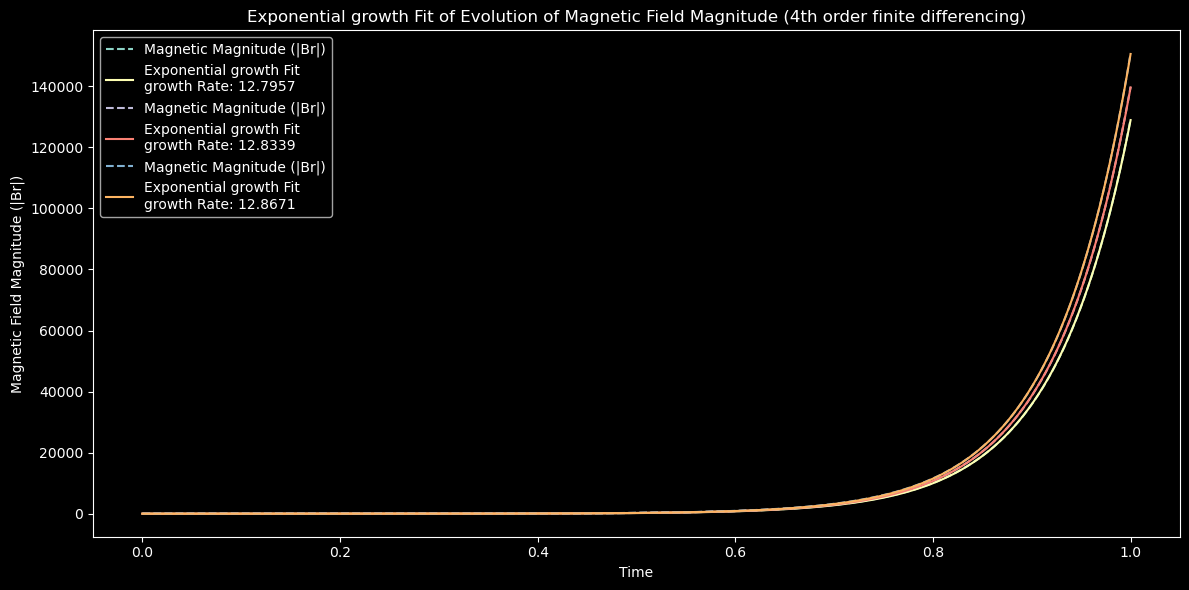

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Define a function for exponential decay
def Expo_growth_func(t, amplitude, growth_rate):
    return amplitude * np.exp(growth_rate * t)

# Extract time and magnetic field magnitude data
Time = np.linspace(0, Total_Time, Nt + 1)

# Plotting the fit
plt.figure(figsize=(12, 6))
for i in range(3):
    B_magnitude = np.abs(evolution_of_Br[:, i])  # Magnitude at a specific radial position
    plt.plot(Time, B_magnitude, label='Magnetic Magnitude (|Br|)', linestyle='--')
    # Fit the data to the exponential growth model
    fit_params, _ = curve_fit(Expo_growth_func, Time, B_magnitude)
    plt.plot(Time, Expo_growth_func(Time, *fit_params),  label=f'Exponential growth Fit\ngrowth Rate: {fit_params[1]:.4f}')
plt.xlabel('Time')
plt.ylabel('Magnetic Field Magnitude (|Br|)')
plt.title('Exponential growth Fit of Evolution of Magnetic Field Magnitude (4th order finite differencing)')
plt.legend()
plt.tight_layout()
plt.show()

The critcal dynamo number value we get = -12.0281
The value of R at which the critcal value is reached = 2.4121


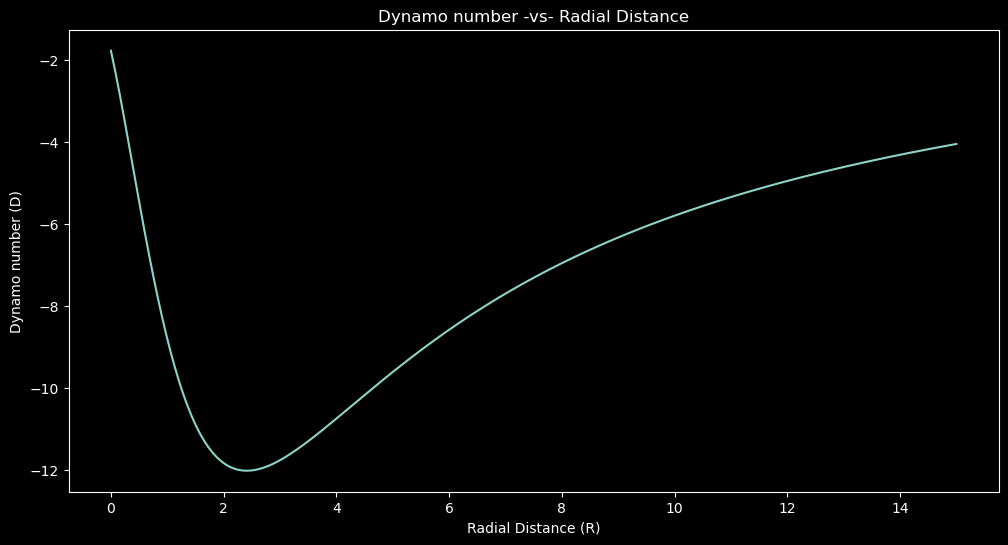

In [28]:
for t in range(Nt + 1):
    D = np.array([])
    evolution_of_Br[t, :] = np.copy(Br)
    evolution_of_Bphi[t, :] = np.copy(Bphi)
    Omega = omega0 / (1 + (R / r_omega) ** 2) ** 0.5
    q = ((R / r_omega) ** 2) * (1 + (R / r_omega) ** 2) ** (-1)
    D_ = -(alpha_0*q*Omega*h**3)/(eta_diffusivity**2)
    D = np.append(D, D_)
    
r = np.linspace(0, R_max, len(D))
plt.figure(figsize=(12, 6))
plt.plot(r,D)
plt.xlabel('Radial Distance (R)')
plt.ylabel('Dynamo number (D)')
plt.title('Dynamo number -vs- Radial Distance')

# to find the critical dynamo number
print(f'The critcal dynamo number value we get = {np.min(D):.4f}')
print(f'The value of R at which the critcal value is reached = {r[np.argmin(D)]:.4f}')